In [1]:
# Importing the libraries
import math
import pandas as pd

import numpy as    np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
import utils

In [3]:
# Importing the dataset
df = pd.read_csv('data/sensors.csv')
df.head() # Displaying the first 5 elements

,date,people,co2,hum1,hum2,hum3,hum4,temp1,temp2,temp3,temp4,light1,light2,light3,light4
0,2020-02-22T14:57:00.010Z,0.0,368.0,47.788,46.110,NaN,44.695,29.366,29.305,NaN,29.724,0.0,0.0,NaN,0.0
1,2020-02-22T14:56:30.014Z,0.0,368.0,47.776,46.101,NaN,44.672,29.337,29.321,NaN,29.751,0.0,0.0,NaN,0.0
2,2020-02-22T14:56:00.007Z,0.0,368.0,47.729,46.113,NaN,44.659,29.353,29.305,NaN,29.724,0.0,0.0,NaN,0.0
3,2020-02-22T14:55:30.011Z,0.0,370.0,47.720,46.026,NaN,44.685,29.366,29.347,NaN,29.737,0.0,0.0,NaN,0.0
4,2020-02-22T14:55:00.011Z,0.0,370.0,47.716,46.062,NaN,44.671,29.366,29.334,NaN,29.724,0.0,0.0,NaN,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10039 entries, 0 to 10038
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    10039 non-null  object 
 1   people  9953 non-null   float64
 2   co2     9858 non-null   float64
 3   hum1    9752 non-null   float64
 4   hum2    9631 non-null   float64
 5   hum3    8977 non-null   float64
 6   hum4    9692 non-null   float64
 7   temp1   9752 non-null   float64
 8   temp2   9631 non-null   float64
 9   temp3   8977 non-null   float64
 10  temp4   9692 non-null   float64
 11  light1  9752 non-null   float64
 12  light2  9631 non-null   float64
 13  light3  8977 non-null   float64
 14  light4  9692 non-null   float64
dtypes: float64(14), object(1)
memory usage: 1.1+ MB


In [5]:
def replaceNA(value):
    if value == '-':
        return np.nan
    else:
        return value

df = df.applymap(replaceNA)
df = df.dropna()
df.head()

,date,people,co2,hum1,hum2,hum3,hum4,temp1,temp2,temp3,temp4,light1,light2,light3,light4
120,2020-02-21T17:18:30.004Z,0.0,394.0,47.298,46.421,45.705,45.216,30.253,29.796,30.255,30.132,0.0,0.0,0.0,0.0
121,2020-02-21T17:18:00.003Z,0.0,394.0,47.442,46.447,45.711,45.231,30.239,29.828,30.311,30.119,0.0,0.0,0.0,0.0
122,2020-02-21T17:17:30.003Z,0.0,394.0,47.337,46.374,45.776,45.254,30.279,29.828,30.325,30.119,0.0,0.0,0.0,0.0
123,2020-02-21T17:17:00.005Z,0.0,394.0,47.355,46.401,45.820,45.174,30.266,29.828,30.325,30.132,0.0,0.0,0.0,0.0
124,2020-02-21T17:16:30.003Z,0.0,395.0,47.303,46.433,45.829,45.208,30.295,29.841,30.282,30.132,0.0,0.0,0.0,0.0


In [6]:
hum_df = df[['hum1', 'hum2', 'hum3', 'hum4']]
temp_df = df[['temp1', 'temp2', 'temp3', 'temp4']]
light_df = df[['light1', 'light2', 'light3', 'light4']]

print('hum features :', list(hum_df.columns))
print('temp features :', list(temp_df.columns))
print('light features :', list(light_df.columns))

df_avg = df.loc[:, ['people', 'co2']]
df_avg['hum_avg'] = hum_df.mean(axis=1)
df_avg['temp_avg'] = temp_df.mean(axis=1)
df_avg['light_avg'] = light_df.mean(axis=1)

df_avg.head()

hum features : ['hum1', 'hum2', 'hum3', 'hum4']
temp features : ['temp1', 'temp2', 'temp3', 'temp4']
light features : ['light1', 'light2', 'light3', 'light4']


,people,co2,hum_avg,temp_avg,light_avg
120,0.0,394.0,46.16000,30.10900,0.0
121,0.0,394.0,46.20775,30.12425,0.0
122,0.0,394.0,46.18525,30.13775,0.0
123,0.0,394.0,46.18750,30.13775,0.0
124,0.0,395.0,46.19325,30.13750,0.0


In [7]:
df_avg.describe()

,people,co2,hum_avg,temp_avg,light_avg
count,8754.00000,8754.000000,8754.000000,8754.000000,8754.000000
mean,3.83162,873.106466,51.552062,26.667819,126.177719
std,3.51283,306.768297,6.746536,1.110084,80.615172
min,0.00000,330.000000,39.573000,23.557250,0.000000
25%,1.00000,639.000000,44.851312,26.155000,56.008312
50%,3.00000,828.500000,52.475500,26.454000,178.615125
75%,6.00000,1123.000000,56.796125,26.755063,193.335500
max,16.00000,1734.000000,67.945750,30.835750,242.768500


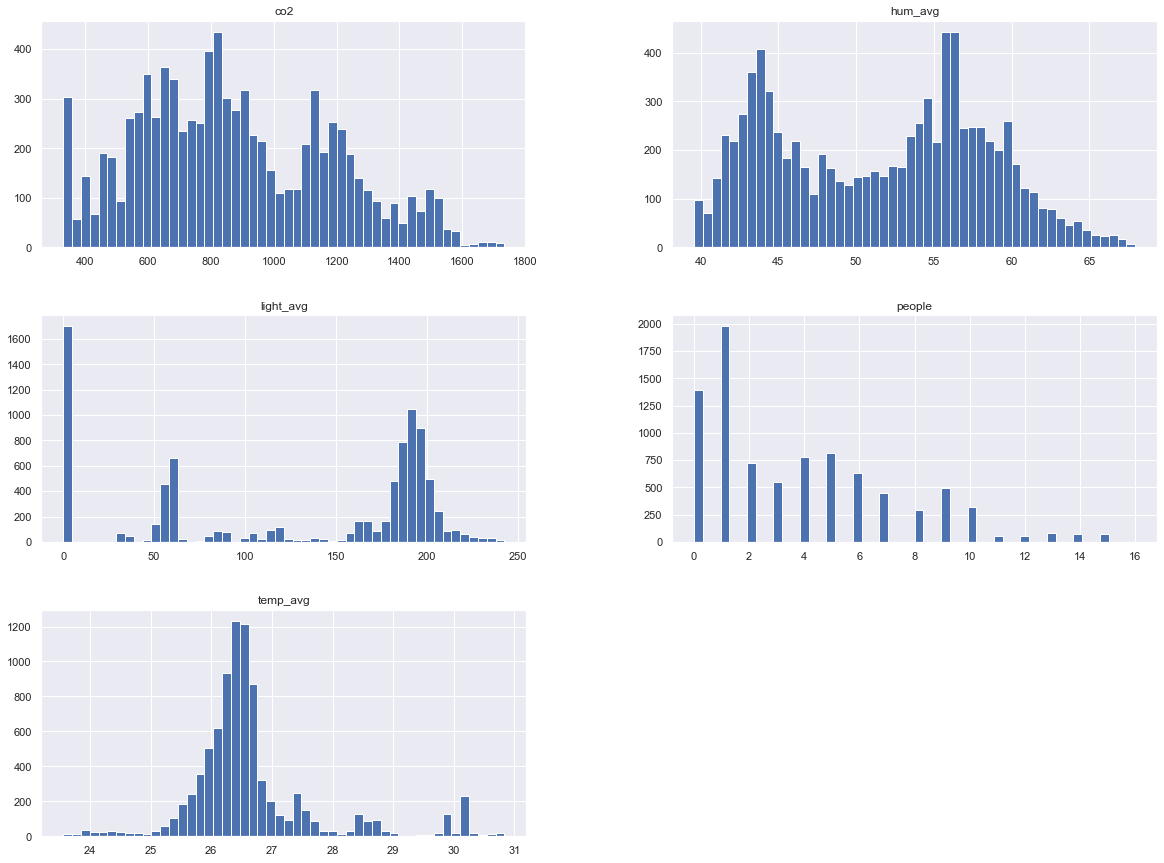

In [8]:
df_avg.hist(bins=50, figsize=(20,15))
plt.show()

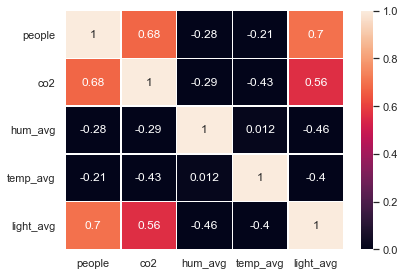

people       1.000000
light_avg    0.702294
co2          0.678713
temp_avg    -0.214993
hum_avg     -0.275662
Name: people, dtype: float64

In [73]:
sns_plot = sns.heatmap(df_avg.corr(), vmin=0, vmax=1, linewidths=.5, annot=True)
sns_plot.figure.tight_layout()
sns_plot.figure.savefig('plot/corr.png', format='png', dpi=300)
plt.show()

df_avg.corr()['people'].sort_values(ascending=False)

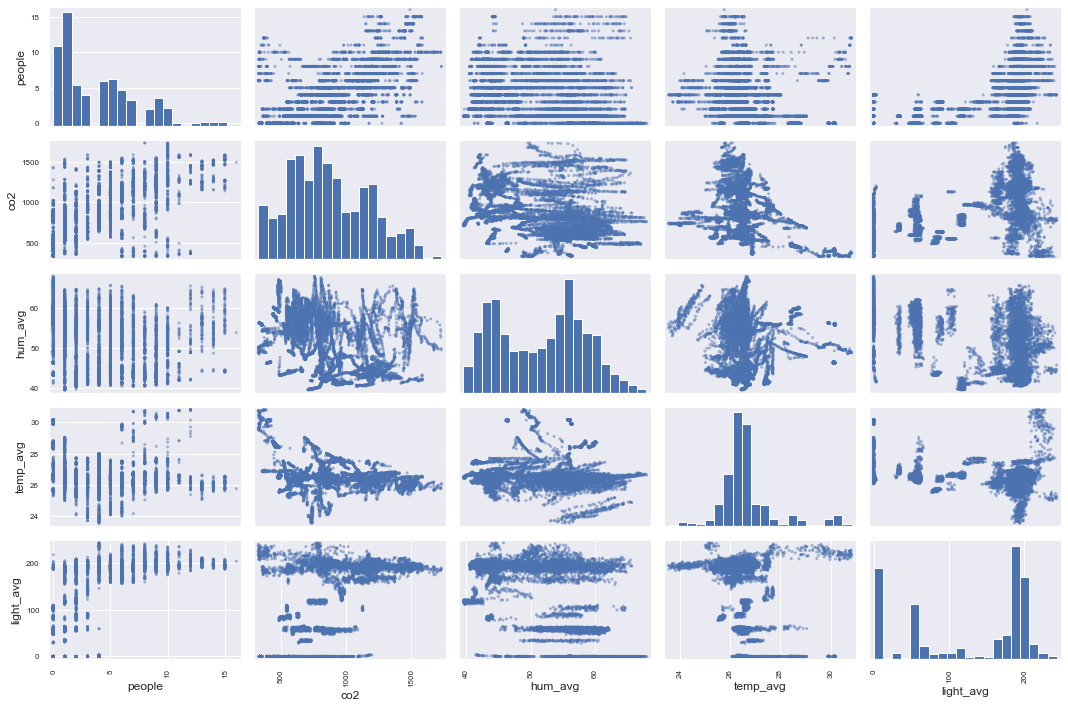

In [81]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

scatter_matrix(df_avg, hist_kwds={'bins': 20}, figsize=(15, 10))
plt.tight_layout()
plt.savefig('plot/scatter_matrix.png', format='png', dpi=300)
plt.show()

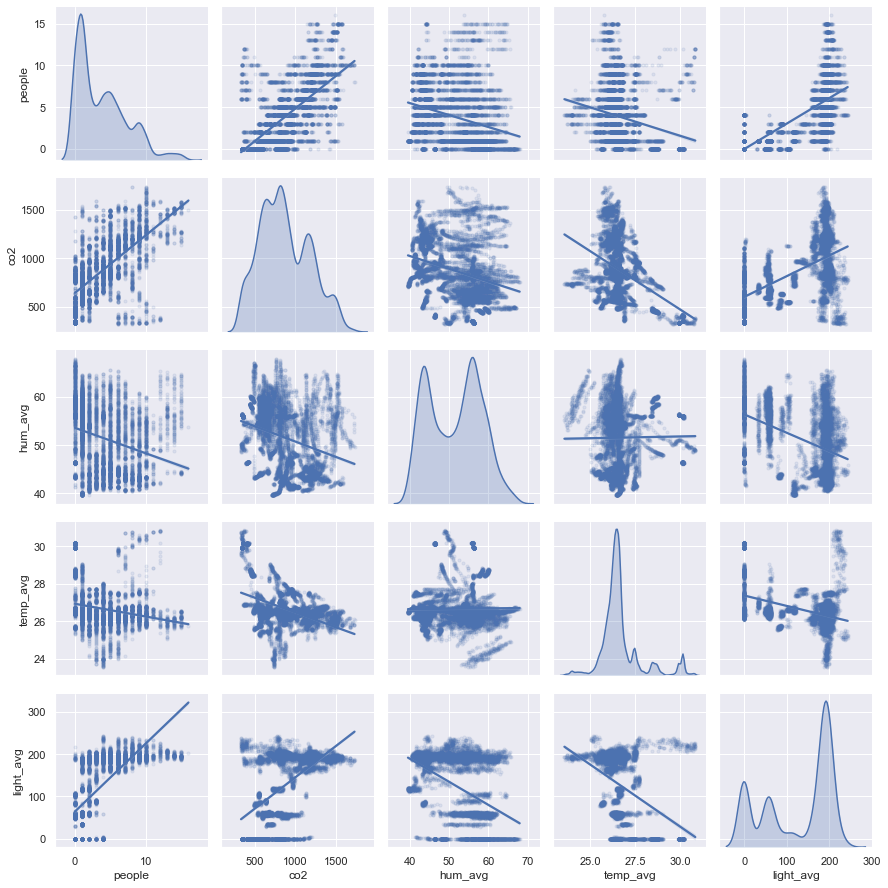

In [95]:
sns.pairplot(df_avg, kind='reg', diag_kind="kde", plot_kws=dict(scatter_kws=dict(alpha=0.1, s=10)))
plt.tight_layout()
plt.savefig('plot/scatter_matrix.png', format='png', dpi=300)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

X = df_avg.iloc[:, 1:]
y = df_avg.iloc[:, 0]

In [18]:
# Reduce dimension
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

print('Features :', list(X.columns))
print('PC explained variance ratio :', list(pca.explained_variance_ratio_))
print('Optimum dimension :', d)

Features : ['co2', 'hum_avg', 'temp_avg', 'light_avg']
PC explained variance ratio : [0.9563880045286566, 0.043246408161425845, 0.0003566436274628317, 8.94368245468037e-06]
Optimum dimension : 1


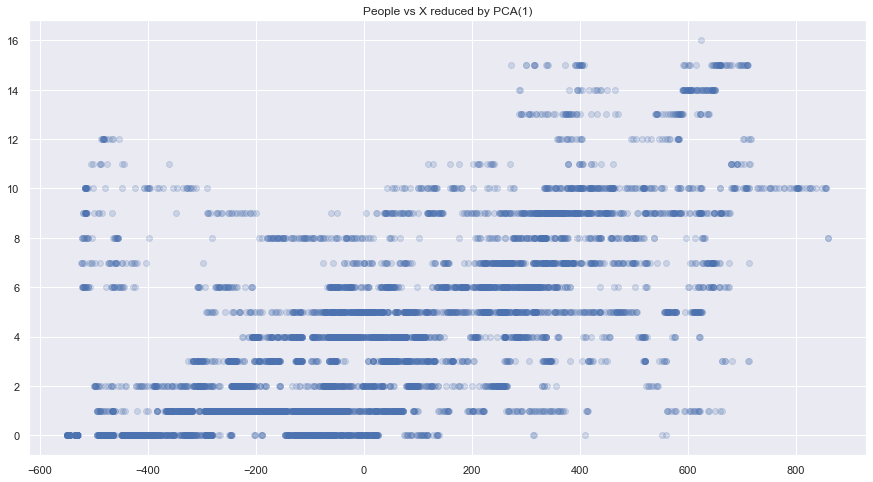

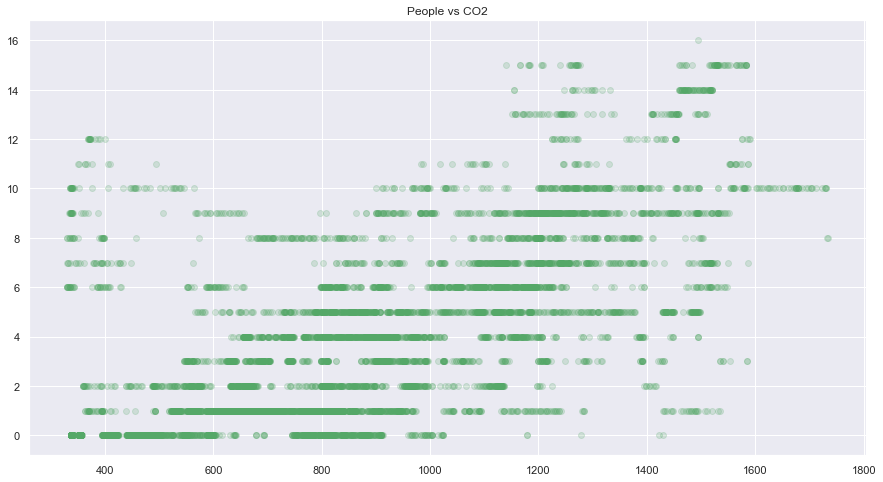

In [19]:
pca = PCA(n_components=1)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(15, 8))
plt.title('People vs X reduced by PCA(1)')
plt.scatter(X_reduced, y, alpha=0.2)
plt.show()

plt.figure(figsize=(15, 8))
plt.title('People vs CO2')
plt.scatter(df_avg['co2'], df_avg['people'], alpha=0.2, color='g')
# plt.scatter(X_reduced, y, alpha=0.2, color='b')
plt.show()

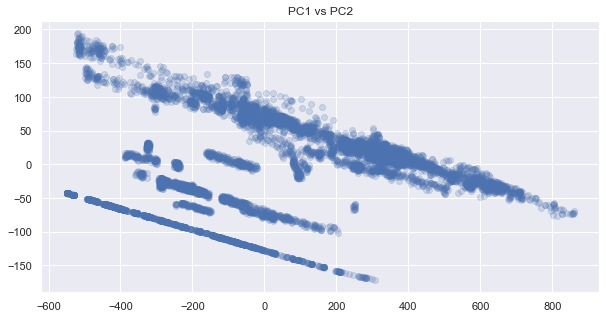

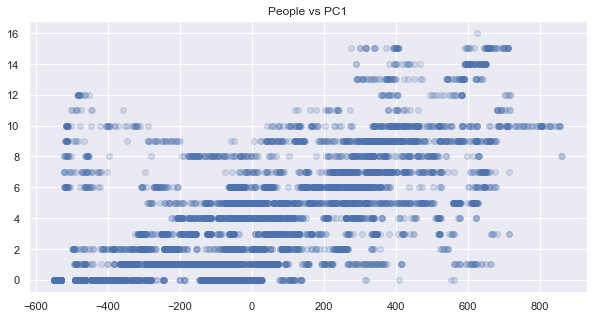

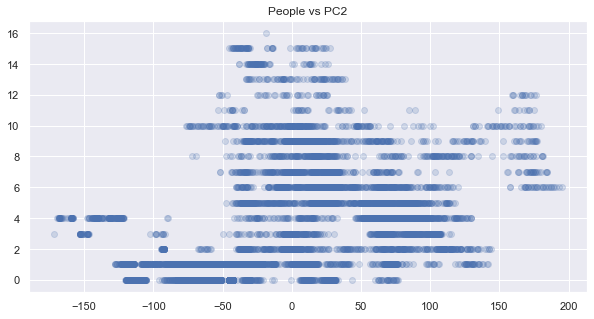

In [20]:
X_reduced2 = PCA(n_components=2).fit_transform(X)

plt.figure(figsize=(10, 5))
plt.title('PC1 vs PC2')
plt.scatter(X_reduced2.T[0], X_reduced2.T[1], alpha=0.2)
plt.show()

plt.figure(figsize=(10, 5))
plt.title('People vs PC1')
plt.scatter(X_reduced2.T[0], y, alpha=0.2)
plt.show()

plt.figure(figsize=(10, 5))
plt.title('People vs PC2')
plt.scatter(X_reduced2.T[1], y, alpha=0.2)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

RSEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=RSEED)

X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

In [22]:
import matplotlib
from sklearn.metrics import mean_squared_error

# coef must be pandas series
def plot_reg_coef(name, coef, figsize=(8.0, 4.0)):
    imp_coef = coef.sort_values()

    matplotlib.rcParams['figure.figsize'] = figsize
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance ({})".format(name))
    plt.show()
    
def inspect_linear_model(reg, X_train, X_test, y_train, y_test):
    model_name = reg.__class__.__name__

    print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
    print("Best score using built-in LassoCV: %f" %
          reg.score(X, y))
    print("Best score using built-in LassoCV (test): %f" %
          reg.score(X_test, y_test))
    coef = pd.Series(reg.coef_, index=X_train.columns)

    print(model_name + " picked " + str(sum(coef != 0)) +
          " variables and eliminated the other " + str(sum(coef == 0)) + " variables")

    plot_reg_coef(model_name, coef)


Best alpha using built-in LassoCV: 0.729955
Best score using built-in LassoCV: 0.614299
Best score using built-in LassoCV (test): 0.610793
LassoCV picked 3 variables and eliminated the other 1 variables


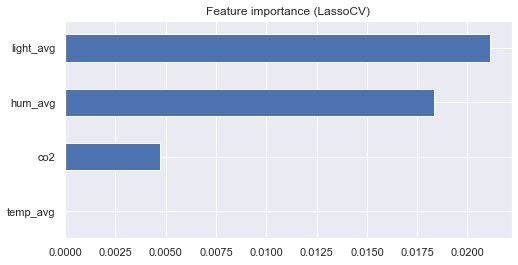

Training RMSE : 2.1730132269152427
Training MAE : 1.6063261242167763
Training Explained Variance : 0.6151421737963332
Testing RMSE : 2.2151830010943354
Testing MAE : 1.633307214428321
Testing Explained Variance : 0.6110565517660995


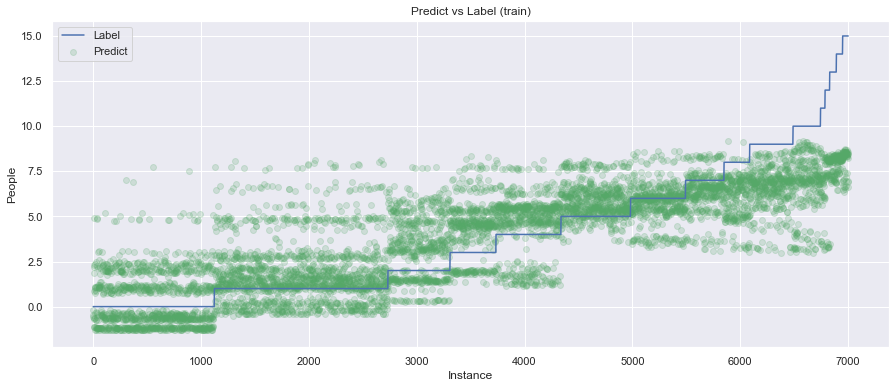

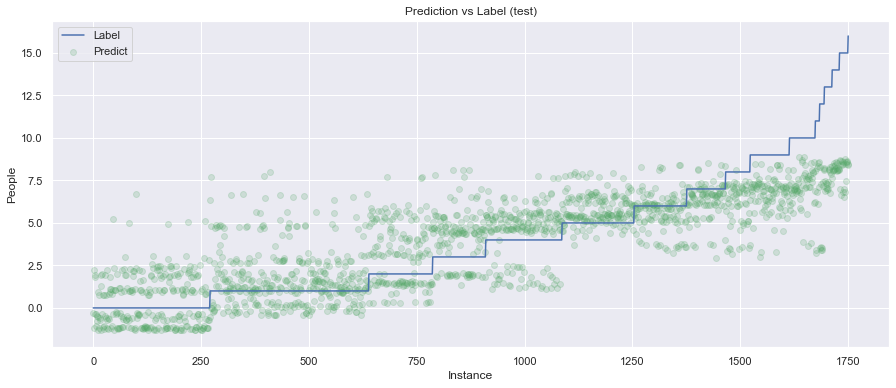

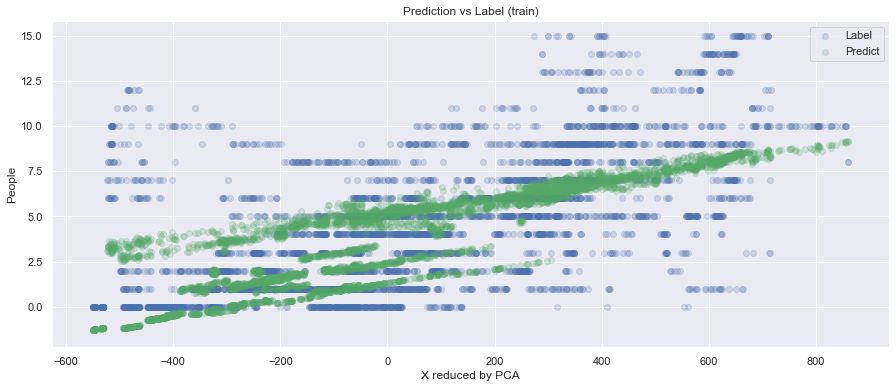

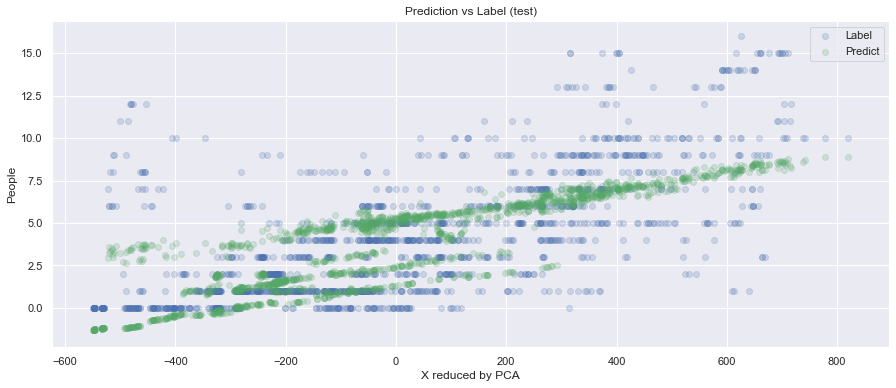

In [23]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

lasso_reg = LassoCV()
lasso_reg.fit(X_train, y_train)
# lasso_reg.fit(X, y)

inspect_linear_model(lasso_reg, X_train, X_test, y_train, y_test)
utils.plot_prediction_wtih_pca(lasso_reg, pca, X_train, X_test, y_train, y_test)

Best alpha using built-in LassoCV: 1.000000
Best score using built-in LassoCV: 0.654407
Best score using built-in LassoCV (test): 0.650161
RidgeCV picked 4 variables and eliminated the other 0 variables


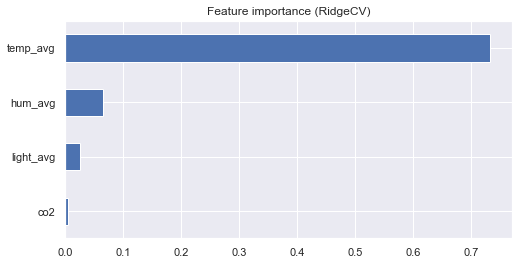

Training RMSE : 2.0560812324618842
Training MAE : 1.5119267132650782
Training Explained Variance : 0.6554469325135481
Testing RMSE : 2.100163160408761
Testing MAE : 1.5449829125951327
Testing Explained Variance : 0.6504705048837017


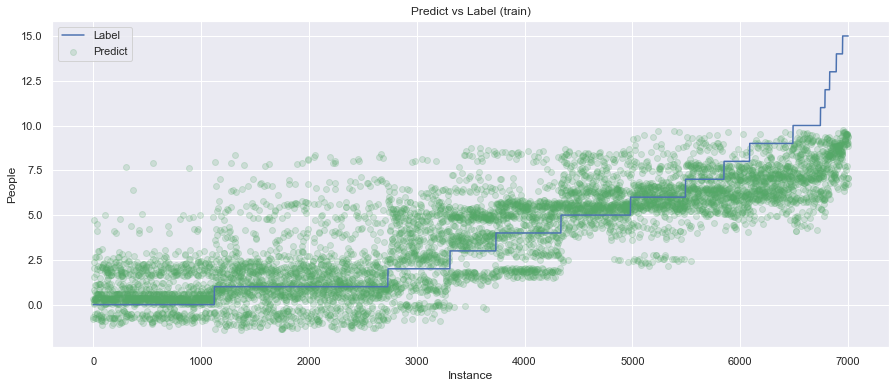

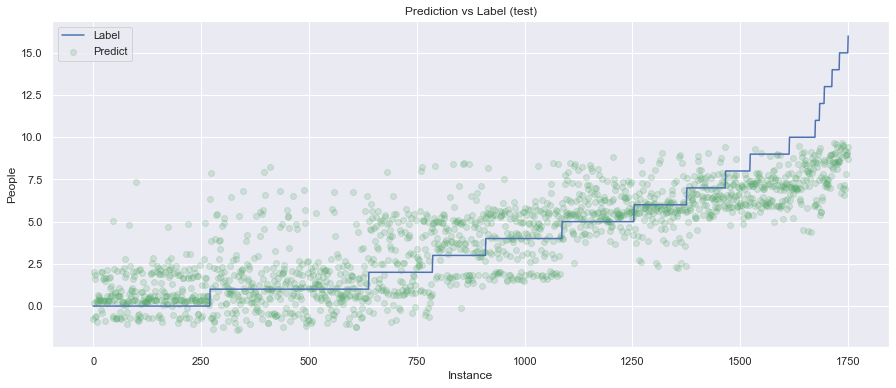

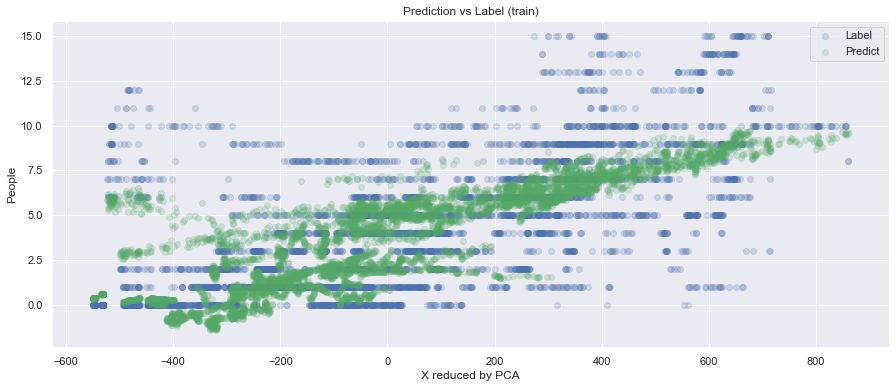

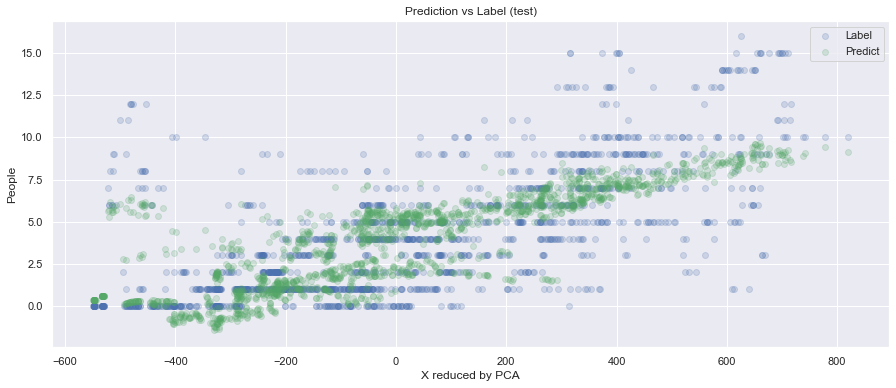

In [24]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error


ridge_reg = RidgeCV()
ridge_reg.fit(X_train, y_train)
# ridge_reg.fit(X, y)

inspect_linear_model(ridge_reg, X_train, X_test, y_train, y_test)
utils.plot_prediction_wtih_pca(ridge_reg, pca, X_train, X_test, y_train, y_test)

In [25]:
ridge_reg.intercept_, ridge_reg.coef_

(-27.172607771205847, array([0.0055328 , 0.06602593, 0.73316482, 0.02540331]))

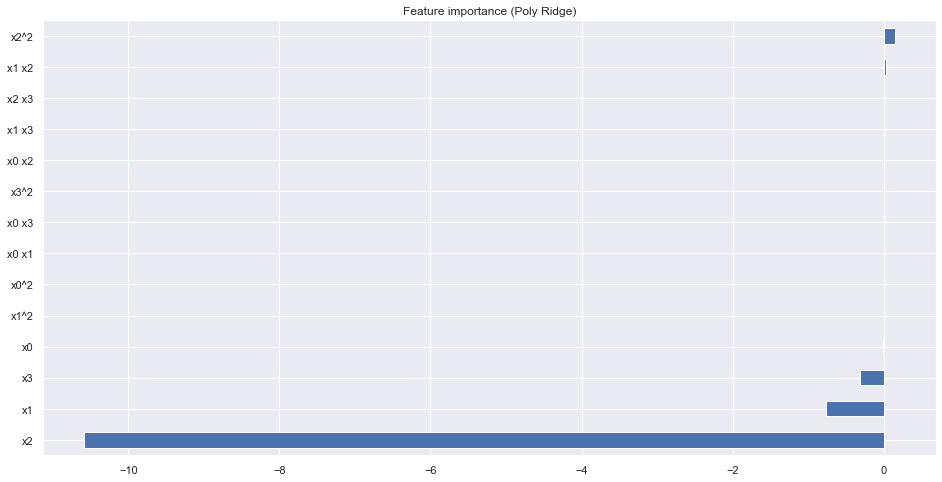

Training RMSE : 44.162174867064486
Training MAE : 35.90270469171517
Training Explained Variance : -157.95584020036773
Testing RMSE : 43.699256015382396
Testing MAE : 35.39725098368735
Testing Explained Variance : -150.41976218841205


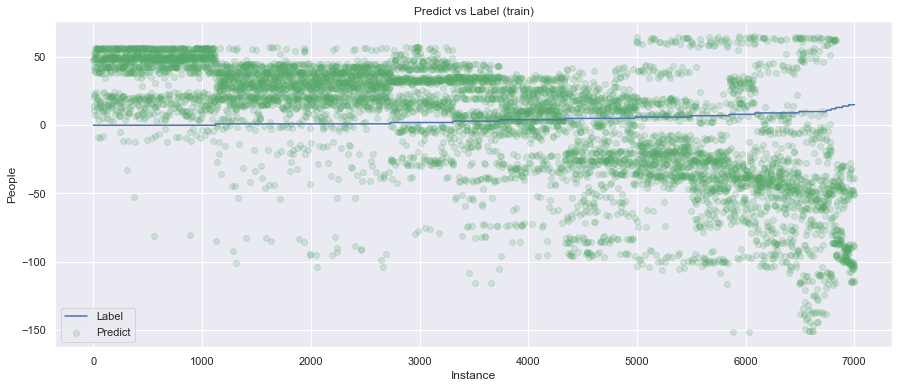

In [26]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

X_train_poly.shape
poly_ridge_reg = RidgeCV()
poly_ridge_reg.fit(X_train_poly, y_train)

poly_pca = PCA(n_components=1)
poly_pca.fit(X_train_poly)

# inspect_linear_model(poly_ridge_reg, X_train_poly, X_test_poly, y_train, y_test)
coef = pd.Series(poly_ridge_reg.coef_, index=poly.get_feature_names())
plot_reg_coef('Poly Ridge', coef, figsize=(16,8))
# utils.plot_prediction_wtih_pca(poly_ridge_reg, poly_pca, X_train_poly, X_test_poly, y_train, y_test)

X_train_reduced = poly_pca.transform(X_train_poly)
X_test_reduced = poly_pca.transform(X_test_poly)

y_train_pred = poly_ridge_reg.predict(X_train_poly)
y_test_pred = poly_ridge_reg.predict(X_test_poly)

utils.val_metrics(y_train, y_train_pred, prefix='Training')
utils.val_metrics(y_test, y_test_pred)